In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import scienceplots
import numpy as np 

plt.style.use('science')
os.makedirs('pic', exist_ok=True)

In [2]:
result = pd.read_csv("re_eval_quality_indicators.csv")
approachs = list(result['approach'].unique())
stop_gen_set = np.load("stop_gen_set.npy").tolist()
reeval_IGD_set = np.load("reeval_IGD_set.npy").tolist()
used_th_set = np.load("used_th_set.npy").tolist()

standard_data = []
for using_M in range(1,21):
    standard_data.append(result[result['approach'] == f'standard_H_0_M_{using_M}']['IGD'].mean())
generations = ['21', '42', '63', '84']
H = [1,2,3,4]
df = {}
for idx, generation in enumerate(generations):
    M = [i for i in range(1, int(generation))]
    using_H = H[idx]
    df[f'H={using_H}'] = []
    for using_M in M:
        data = result[result['approach'] == f'incremental-data_lab28_special_utilization_model12.pth_H_{using_H}_M_{using_M}']['IGD'].mean()
        df[f'H={using_H}'].append(data)


## H = 1

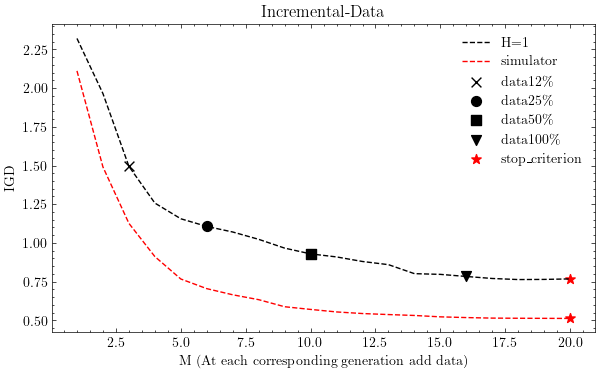

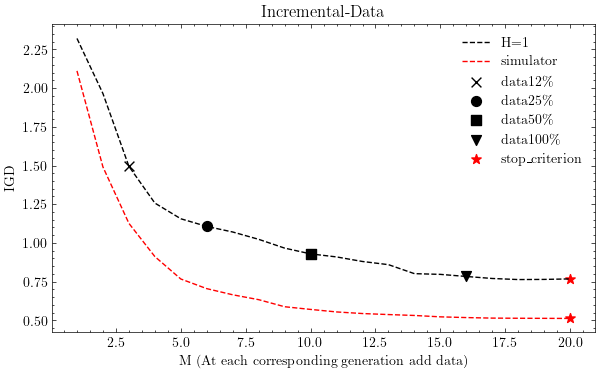

In [3]:
# stop_gen 
# reeval_IGD 
# used_th 
os.makedirs(os.path.join('pic', 'plot_IGD_criterion'), exist_ok=True)
# generations = ['20', '40', '60', '80']
generations = 20
using_H = 1
size = 50
# for plot_idx in range(len(stop_gen_set)):
for plot_idx in range(1,3):
    performance = []
    marker = ['x', 'o', 's', 'v']
    models = ['data12%', 'data25%', 'data50%', 'data100%']
    colors = ['k', 'g', 'b', 'c']
    # for cidx, key in enumerate(df.keys()):
    plt.figure(figsize=(7,4))
    
    idx = 0
    M = [i for i in range(1, generations+1)]
    plt.plot(M, df[f'H={using_H}'][:generations], f'{colors[idx]}--', label=f'H={using_H}')
    performance.append(df[f'H={using_H}'])
        
        
    plt.plot([i for i in range(1,21)],standard_data, linestyle='--', color='r', label='simulator')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  
    count = 0
    cidx = 0
    M = [i for i in range(1, generations+1)]
    for idx, value in enumerate(df[f'H={using_H}'][:generations]):
        if idx == using_H*2:
            if count == 0:
                plt.scatter(M[idx], value, marker='x', label='data12\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='x', c=colors[cidx], s=size)
        elif idx == using_H*5:
            if count == 0:
                plt.scatter(M[idx], value, marker='o', label='data25\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='o', c=colors[cidx], s=size)
        elif idx == using_H*9:
            if count == 0:
                plt.scatter(M[idx], value, marker='s', label='data50\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='s', c=colors[cidx], s=size)
        elif idx == using_H*15:
            if count == 0:
                plt.scatter(M[idx], value, marker='v', label='data100\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='v', c=colors[cidx], s=size)



    # model_used = ['data100%', 'data50%', 'data25%', 'data12%']
    # for idx, each_performance in enumerate(new_performance):
    #     plt.plot([20,40,60,80,100], each_performance, label=model_used[idx])

    plt.scatter([stop_gen_set[plot_idx][using_H-1], stop_gen_set[plot_idx][-1]] , [reeval_IGD_set[plot_idx][using_H-1], reeval_IGD_set[plot_idx][-1]], marker="*", c='red', s=size, label='stop_criterion')

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.ylabel('IGD')
    plt.xlabel('M (At each corresponding generation add data)')
    # plt.xticks(M, M)
    # plt.ylim(0.2,2)
    plt.title("Incremental-Data")
    plt.savefig(os.path.join('pic', 'plot_IGD_criterion', f'{used_th_set[plot_idx]}_IGD_criterion.png'), format='png', dpi=300, bbox_inches='tight')
    plt.show()

## H = 2

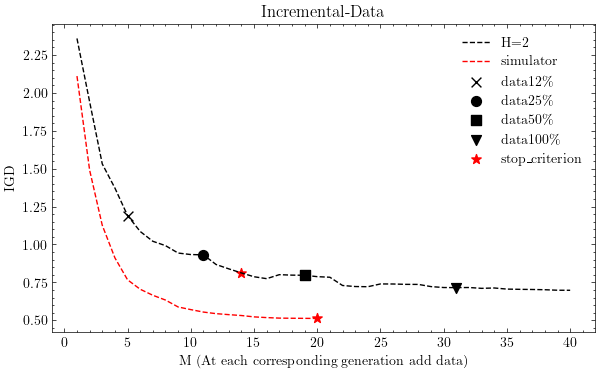

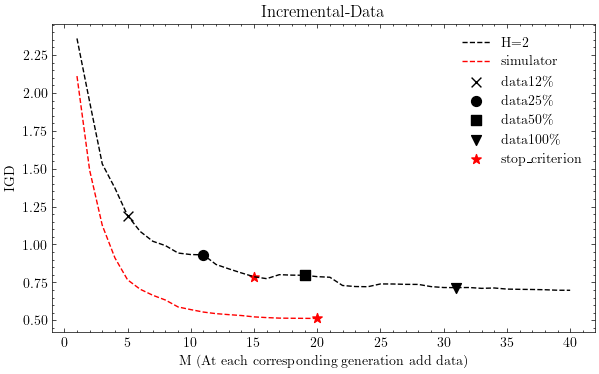

In [4]:
# stop_gen 
# reeval_IGD 
# used_th 
os.makedirs(os.path.join('pic', 'plot_IGD_criterion'), exist_ok=True)
# generations = ['20', '40', '60', '80']
generations = 40
using_H = 2
size = 50
# for plot_idx in range(len(stop_gen_set)):
for plot_idx in range(1,3):
    performance = []
    marker = ['x', 'o', 's', 'v']
    models = ['data12%', 'data25%', 'data50%', 'data100%']
    colors = ['k', 'g', 'b', 'c']
    # for cidx, key in enumerate(df.keys()):
    plt.figure(figsize=(7,4))
    
    idx = 0
    M = [i for i in range(1, generations+1)]
    plt.plot(M, df[f'H={using_H}'][:generations], f'{colors[idx]}--', label=f'H={using_H}')
    performance.append(df[f'H={using_H}'])
        
        
    plt.plot([i for i in range(1,21)],standard_data, linestyle='--', color='r', label='simulator')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  
    count = 0
    cidx = 0
    M = [i for i in range(1, generations+1)]
    for idx, value in enumerate(df[f'H={using_H}'][:generations]):
        if idx == using_H*2:
            if count == 0:
                plt.scatter(M[idx], value, marker='x', label='data12\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='x', c=colors[cidx], s=size)
        elif idx == using_H*5:
            if count == 0:
                plt.scatter(M[idx], value, marker='o', label='data25\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='o', c=colors[cidx], s=size)
        elif idx == using_H*9:
            if count == 0:
                plt.scatter(M[idx], value, marker='s', label='data50\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='s', c=colors[cidx], s=size)
        elif idx == using_H*15:
            if count == 0:
                plt.scatter(M[idx], value, marker='v', label='data100\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='v', c=colors[cidx], s=size)



    # model_used = ['data100%', 'data50%', 'data25%', 'data12%']
    # for idx, each_performance in enumerate(new_performance):
    #     plt.plot([20,40,60,80,100], each_performance, label=model_used[idx])

    plt.scatter([stop_gen_set[plot_idx][using_H-1], stop_gen_set[plot_idx][-1]] , [reeval_IGD_set[plot_idx][using_H-1], reeval_IGD_set[plot_idx][-1]], marker="*", c='red', s=size, label='stop_criterion')

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.ylabel('IGD')
    plt.xlabel('M (At each corresponding generation add data)')
    # plt.xticks(M, M)
    # plt.ylim(0.2,2)
    plt.title("Incremental-Data")
    plt.savefig(os.path.join('pic', 'plot_IGD_criterion', f'{used_th_set[plot_idx]}_IGD_criterion.png'), format='png', dpi=300, bbox_inches='tight')
    plt.show()

## H = 3

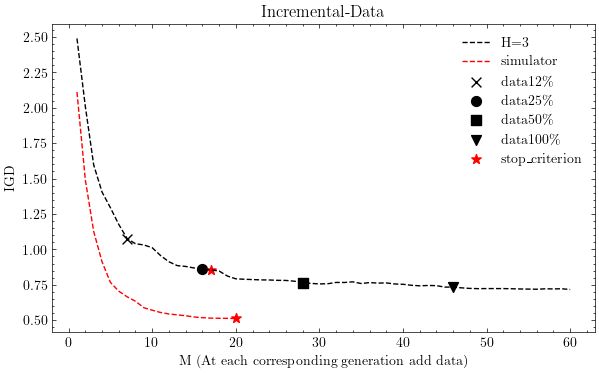

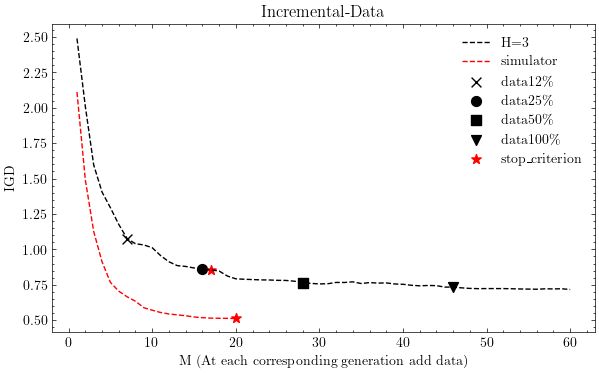

In [5]:
# stop_gen 
# reeval_IGD 
# used_th 
os.makedirs(os.path.join('pic', 'plot_IGD_criterion'), exist_ok=True)
# generations = ['20', '40', '60', '80']
generations = 60
using_H = 3
size = 50
save_plot_data = {}
# for plot_idx in range(len(stop_gen_set)):
for plot_idx in range(1,3):
    performance = []
    marker = ['x', 'o', 's', 'v']
    models = ['data12%', 'data25%', 'data50%', 'data100%']
    colors = ['k', 'g', 'b', 'c']
    # for cidx, key in enumerate(df.keys()):
    plt.figure(figsize=(7,4))
    
    idx = 0
    M = [i for i in range(1, generations+1)]
    plt.plot(M, df[f'H={using_H}'][:generations], f'{colors[idx]}--', label=f'H={using_H}')
    save_plot_data['M'] = M
    save_plot_data['H'] = df[f'H={using_H}'][:generations]
    performance.append(df[f'H={using_H}'])
        
        
    plt.plot([i for i in range(1,21)],standard_data, linestyle='--', color='r', label='simulator')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  
    count = 0
    cidx = 0
    M = [i for i in range(1, generations+1)]
    for idx, value in enumerate(df[f'H={using_H}'][:generations]):
        if idx == using_H*2:
            if count == 0:
                plt.scatter(M[idx], value, marker='x', label='data12\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='x', c=colors[cidx], s=size)
        elif idx == using_H*5:
            if count == 0:
                plt.scatter(M[idx], value, marker='o', label='data25\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='o', c=colors[cidx], s=size)
        elif idx == using_H*9:
            if count == 0:
                plt.scatter(M[idx], value, marker='s', label='data50\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='s', c=colors[cidx], s=size)
        elif idx == using_H*15:
            if count == 0:
                plt.scatter(M[idx], value, marker='v', label='data100\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='v', c=colors[cidx], s=size)



    # model_used = ['data100%', 'data50%', 'data25%', 'data12%']
    # for idx, each_performance in enumerate(new_performance):
    #     plt.plot([20,40,60,80,100], each_performance, label=model_used[idx])

    plt.scatter([stop_gen_set[plot_idx][using_H-1], stop_gen_set[plot_idx][-1]] , [reeval_IGD_set[plot_idx][using_H-1], reeval_IGD_set[plot_idx][-1]], marker="*", c='red', s=size, label='stop_criterion')

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.ylabel('IGD')
    plt.xlabel('M (At each corresponding generation add data)')
    # plt.xticks(M, M)
    # plt.ylim(0.2,2)
    plt.title("Incremental-Data")
    plt.savefig(os.path.join('pic', 'plot_IGD_criterion', f'{used_th_set[plot_idx]}_IGD_criterion.png'), format='png', dpi=300, bbox_inches='tight')
    plt.show()

## H = 4

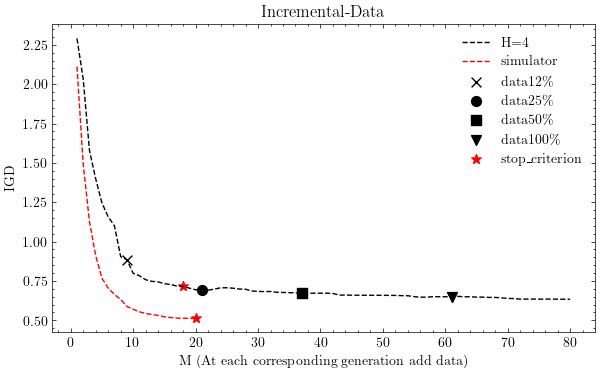

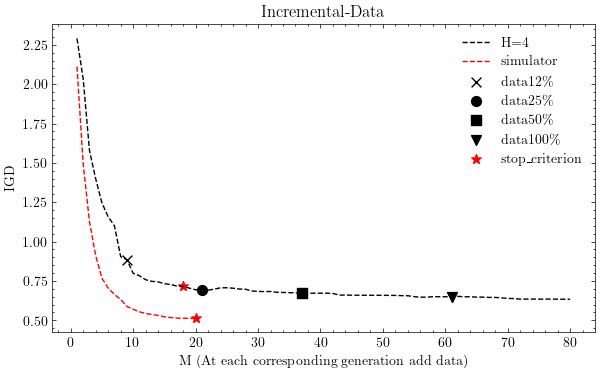

In [6]:
# stop_gen 
# reeval_IGD 
# used_th 
os.makedirs(os.path.join('pic', 'plot_IGD_criterion'), exist_ok=True)
# generations = ['20', '40', '60', '80']
generations = 80
using_H = 4
size = 50
# for plot_idx in range(len(stop_gen_set)):
for plot_idx in range(1,3):
    performance = []
    marker = ['x', 'o', 's', 'v']
    models = ['data12%', 'data25%', 'data50%', 'data100%']
    colors = ['k', 'g', 'b', 'c']
    # for cidx, key in enumerate(df.keys()):
    plt.figure(figsize=(7,4))
    
    idx = 0
    M = [i for i in range(1, generations+1)]
    plt.plot(M, df[f'H={using_H}'][:generations], f'{colors[idx]}--', label=f'H={using_H}')
    performance.append(df[f'H={using_H}'])
        
        
    plt.plot([i for i in range(1,21)],standard_data, linestyle='--', color='r', label='simulator')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  
    count = 0
    cidx = 0
    M = [i for i in range(1, generations+1)]
    for idx, value in enumerate(df[f'H={using_H}'][:generations]):
        if idx == using_H*2:
            if count == 0:
                plt.scatter(M[idx], value, marker='x', label='data12\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='x', c=colors[cidx], s=size)
        elif idx == using_H*5:
            if count == 0:
                plt.scatter(M[idx], value, marker='o', label='data25\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='o', c=colors[cidx], s=size)
        elif idx == using_H*9:
            if count == 0:
                plt.scatter(M[idx], value, marker='s', label='data50\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='s', c=colors[cidx], s=size)
        elif idx == using_H*15:
            if count == 0:
                plt.scatter(M[idx], value, marker='v', label='data100\%', c=colors[cidx], s=size)
            else:
                plt.scatter(M[idx], value, marker='v', c=colors[cidx], s=size)



    # model_used = ['data100%', 'data50%', 'data25%', 'data12%']
    # for idx, each_performance in enumerate(new_performance):
    #     plt.plot([20,40,60,80,100], each_performance, label=model_used[idx])

    plt.scatter([stop_gen_set[plot_idx][using_H-1], stop_gen_set[plot_idx][-1]] , [reeval_IGD_set[plot_idx][using_H-1], reeval_IGD_set[plot_idx][-1]], marker="*", c='red', s=size, label='stop_criterion')

    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.ylabel('IGD')
    plt.xlabel('M (At each corresponding generation add data)')
    # plt.xticks(M, M)
    # plt.ylim(0.2,2)
    plt.title("Incremental-Data")
    plt.savefig(os.path.join('pic', 'plot_IGD_criterion', f'{used_th_set[plot_idx]}_IGD_criterion.png'), format='png', dpi=300, bbox_inches='tight')
    plt.show()